In [4]:
import librosa as lr
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import scipy.fftpack as sf
import scipy.signal as sig


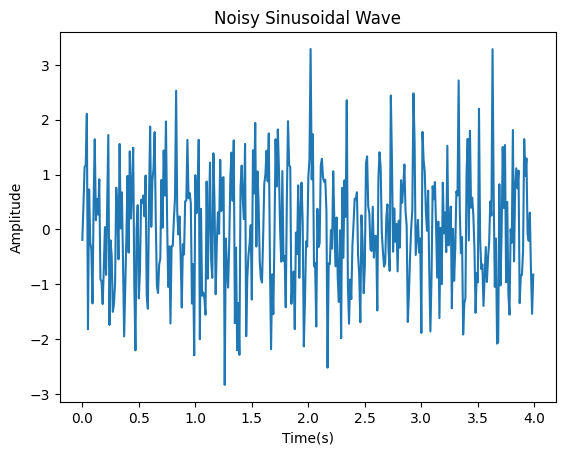

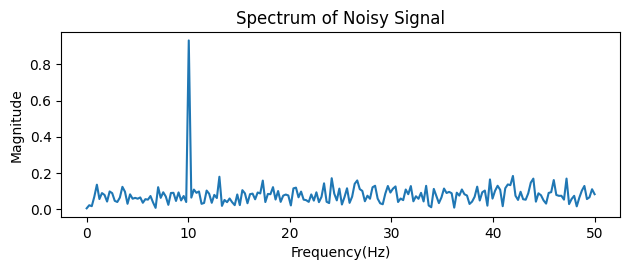

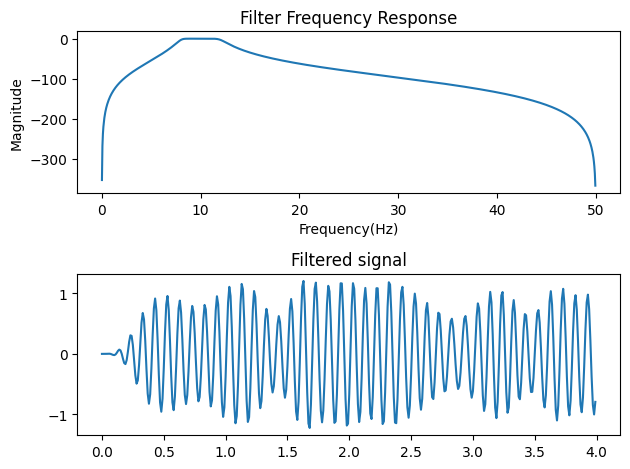

In [40]:
plt.close('all')

# generate signal
Fs = 100
t = 4
n = np.arange(0, t, 1/Fs)
f = 10
x = np.sin(2*pi*f*n)

# Generate nooise
y = np.random.normal(0, 0.8, np.size(x)) # AWGN
x = x + y # Noisy signal

plt.figure(1)
plt.plot(n, x); plt.title('Noisy Sinusoidal Wave'); plt.xlabel('Time(s)'); plt.ylabel('Amplitude')
plt.show()

# Taje spectral analysis
X_f = abs(sf.fft(x))
l = np.size(x)
fr = (Fs/2) * np.linspace(0, 1, int(l/2)) 
xl_m = (2/l)* abs(X_f[0:np.size(fr)])

plt.subplot(2,1,2)
# for logarythmic plt.plot(fr, 20*np.log10(xl_m)); 
plt.plot(fr, xl_m); plt.title('Spectrum of Noisy Signal'); plt.xlabel('Frequency(Hz)'); plt.ylabel('Magnitude')
plt.tight_layout()


# Create a BPF filter
o = 5;
fc = np.array([8,12])
wc = 2*fc/Fs
[b,a] = sig.butter(o, wc, btype = 'bandpass')


# filter response
[W,h] = sig.freqz(b, a, worN = 1024)

W = Fs * W/(2*pi)

plt.figure(2)
plt.subplot(2,1,1)
plt.plot(W, 20*np.log10(h)); plt.title('Filter Frequency Response'); plt.xlabel('Frequency(Hz)'); plt.ylabel('Magnitude')

# Filter the signal
x_filt = sig.lfilter(b, a, x)

plt.subplot(2, 1, 2)
plt.plot(n,x_filt); plt.title('Filtered signal')






plt.tight_layout()

In [21]:
type(l/2);l

400